# Lending Club Case Study - Exploratory Data Analysis

## Problem Statement

You work for a __consumer finance company__ which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two __types of risks__ are associated with the bank’s decision:

- If the applicant is __likely to repay the loan__, then not approving the loan results in a __loss of business__ to the company

- If the applicant is __not likely to repay the loan__, i.e. he/she is likely to default, then approving the loan may lead to a __financial loss__ for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the __driving factors (or driver variables)__ behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Data Understanding

We have been provided with the Private Data of Lending Club. The complete loan data for all loans issued through the time period __2007 to 2011__.

We also have a data dictionary which describes the meaning of these variables.

In [2]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

**Reading the loan data file**

In [3]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)
loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data Cleaning

There are various types of quality issues when it comes to data, and that’s why data cleaning is one of the most time-consuming steps of data analysis. For example, there could be formatting errors (e.g. rows and columns are ill-formatted, unclearly named etc.), missing values, repeated rows, spelling inconsistencies etc. These issues could make it difficult to analyse data and could lead to errors or irrelevant results. Thus, these issues need to be corrected before data is analysed.

Though data cleaning is often done in a somewhat haphazard way and it is too difficult to define a ‘single structured process’, we will process data cleaning in the following steps:

1. Fix rows and columns
2. Fix missing values
3. Standardise values
4. Fix invalid values
5. Filter data

### Fix Missing Values

It is better to let missing values be and continue with the analysis rather than extrapolate the available information.

Let us summarise how to deal with missing values:

1. Set values as missing values: Identify values that indicate missing data, and yet are not recognised by the software as such, e.g treat blank strings, "NA", "XX", "999", etc. as missing.

2. Adding is good, exaggerating is bad: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to keep missing values as such rather than exaggerating the existing rows/columns.

3. Delete rows, columns: Rows could be deleted if the number of missing values are significant in number, as this would not impact the analysis. Columns could be removed if the missing values are quite significant in number.

4. Fill partial missing values using business judgement: Missing time zone, century, etc. These values are easily identifiable.

In [6]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Count the number of missing values in each column of the dataset 'loan'.

In [7]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

There are many columns in the data with 100% missing values. Remove all the columns with more than 50% missing values.

### Fix rows and columns

In [8]:
columns_with_missing_values = list(missing[missing >= 50].index)
len(columns_with_missing_values)

57

There were **57 columns** with more than 50% values as missing. Removing such columns as these columns clearly add noise and wont help in analysis.

In [9]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

After removing such columns. 54 columns remain.
Let's examin further for missing values.

In [10]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

Let's remove the desc column because purpose and title column will do same for the data.

In [11]:
loan = loan.drop('desc',axis=1)

In [12]:
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


Columns __emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens__ are clearly **Categorical** with values belonging to a range.

Let's take a look at all the different values of these Categorical columns

In [13]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [14]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [15]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [16]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [17]:
loan.tax_liens.unique()

array([ 0., nan])

The columns __collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens__ has either value of 0 or nan(no entry/blank). The range of values that these categorical columns can take is not of any significant impact to the analysis.
<br> We can decide to drop these columns for analysis.

In [18]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [19]:
loan.shape

(39717, 50)

Next, lets look at the pub_rec_bankruptcies categorical column with 1.76% missing data. It tells us about the past number of public record bankruptcies of that borrower.

In [20]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case.
While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [21]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [22]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Next, the columns emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with nan/blank values for these varaibles.

In [23]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [24]:
loan.shape

(36548, 50)

In [25]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Now, we are left with 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respectively.
title gives the title of the loan specified by the borrower in the application.
revol_util gives the revolving line utelization and
last_pymnt_d gives the month in which last payment was received.

Let's again remove the rows with null value for these variables.

In [26]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [27]:
loan.shape

(36433, 50)

In [28]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

Now, we have now reduced the data set to have 36433 loan records and 50 attributes with no missing values. Let's write it into another file and use that file for further analysis.

In [29]:
loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

### Further shortlist and narrow down the columns for analysis 

In [30]:
clean_loan = loan[:]

In [31]:
clean_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file.
Let's use this file to get a better understanding of the 50 columns we are left with.
This will help to further narrow down on the columns.

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:

1. **id** : is a random number given to the loan, does not contribute to analysis
2. **member_id** : is a random number given to the member, does not contribute to analysis
3. **pymnt_plan** : value for entire dataset is 'n', therefore can be removed.
4. **url** : is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
5. **zip_code** : first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
6. **initial_list_status** : value for entire dataset is 'f' out of the possible values, therefore can be removed.
7. **policy_code** : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
8. **application_type** : value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
9. **acc_now_delinq** : value for entire dataset is '0', therefore can be removed.
10. **delinq_amnt** : value for entire dataset is '0', therefore can be removed.
11. **funded_amnt** : value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
12. **funded_amnt_inv** : value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

Dropping the above columns from the clean_loan dataframe.

In [32]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_loan= clean_loan.drop(columns_tobe_dropped,axis=1)

In [33]:
clean_loan.shape

(36433, 38)

Columns for analysis reduced to 38 columns.

### Standardise values

Next, let's standardize the precision of the data. There are certain columns with need rounding of the values up until two decimal places.

These columns are:

1. __total_pymnt__
2. __total_rec_late_fee__
3. __collection_recovery_fee__

In [34]:
clean_loan.total_pymnt.value_counts().tail()

5517.160000     1
12878.238670    1
4348.288927     1
8954.809409     1
4608.000000     1
Name: total_pymnt, dtype: int64

In [35]:
clean_loan.total_rec_late_fee.value_counts().tail()

29.914662    1
23.820000    1
15.610000    1
59.781000    1
14.944409    1
Name: total_rec_late_fee, dtype: int64

In [36]:
clean_loan.collection_recovery_fee.value_counts().tail()

18.3264     1
198.4078    1
9.6738      1
33.2896     1
93.3678     1
Name: collection_recovery_fee, dtype: int64

In [37]:
clean_loan.total_pymnt= round(clean_loan.total_pymnt,2)
clean_loan.total_rec_late_fee= round(clean_loan.total_rec_late_fee,2)
clean_loan.collection_recovery_fee= round(clean_loan.collection_recovery_fee,2)

### Fix invalid values

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.

These columns are:

1. issue_d
2. earliest_cr_line
3. last_pymnt_d
4. last_credit_pull_d

In [38]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null object
earliest_cr_line      36433 non-null object
last_pymnt_d          36433 non-null object
last_credit_pull_d    36433 non-null object
dtypes: object(4)
memory usage: 1.4+ MB


Converting the dtype of these columns to datetime

In [39]:
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
clean_loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
clean_loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
clean_loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

In [40]:
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null datetime64[ns]
earliest_cr_line      36433 non-null datetime64[ns]
last_pymnt_d          36433 non-null datetime64[ns]
last_credit_pull_d    36433 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


Dropping Duplicated rows if any,

In [41]:
clean_loan=clean_loan.drop_duplicates()
clean_loan.shape

(36433, 38)

### Filter data

Next, there are few columns expressing % like int_rate and revol_util.
These has values like '15.27%' and '9.40%'.
Further these columns has dtype as 'object'. Let's convert these columns to have just the value withoout '%' and typecast it to float.

In [42]:
clean_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [43]:
clean_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [44]:
clean_loan['int_rate'] = clean_loan['int_rate'].str.strip('%').astype('float')
clean_loan['revol_util'] = clean_loan['revol_util'].str.strip('%').astype('float')

In [45]:
clean_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
int_rate      36433 non-null float64
revol_util    36433 non-null float64
dtypes: float64(2)
memory usage: 853.9 KB


Let us now take a look at the __emp_length__ column.

In [46]:
clean_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

According to the data_dictionary file description for this field,
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
Let's convert the column to have values between 0 and 10.

In [47]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [48]:
clean_loan = clean_loan.replace({"emp_length": emp_length_dict })

In [49]:
clean_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
<br> removing the months string from within the column term.

In [50]:
clean_loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [51]:
clean_loan['term'] = clean_loan.term.apply(lambda x: x.split()[0])
clean_loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

**earliest_cr_line** : The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

Lets split the available date into month and year column.

In [52]:
clean_loan['earliest_cr_line_month'] = clean_loan['earliest_cr_line'].dt.month
clean_loan['earliest_cr_line_year'] = clean_loan['earliest_cr_line'].dt.year
len(clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ])

50

We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have).
Lets see the data to understand why.

In [53]:
clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries. 

In [54]:
clean_loan.loc[clean_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loan['earliest_cr_line_year'] - 100
clean_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

**issue_d:** The month which the loan was funded .Lets split the available date into month and year column.

In [55]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

Writing the ready to analyse data to a csv. We will use this new csv for ease in further analysis.

In [56]:
clean_loan.to_csv('final_loan.csv', encoding='utf-8', index=False)

## Analysis

Load the final data for further anaysis.

In [57]:
final_loan = clean_loan[:]
final_loan.shape

(36433, 42)

In [58]:
final_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [59]:
final_loan = final_loan[final_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
final_loan.shape

(35367, 42)

### Univariate and Segmented Univariate Analysis

Define a few methods to aid in plotting graphs

In [60]:
## Found this solution to show labels in bar plots from https://stackoverflow.com/a/48372659 and edited

def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [61]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [62]:
# This method plots a distribution of target column, and its boxplot against loan_status column

def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [63]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest

def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (final_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    values = (final_loan.loc[final_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [64]:
(final_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: grade, dtype: float64

**loan_status** : Current status of the loan

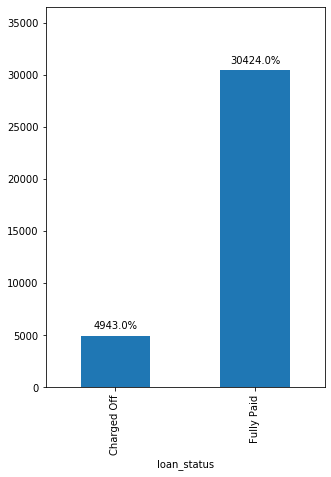

In [65]:
plt.figure(figsize=(5,7))
ax = final_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [66]:
print("%.2f" % (final_loan.loc[final_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(final_loan)))

13.98


Approximately 14% of loans in the dataset are defaulted.
Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. (16.5 is 18% higher than 13.97 - a large enough increase)

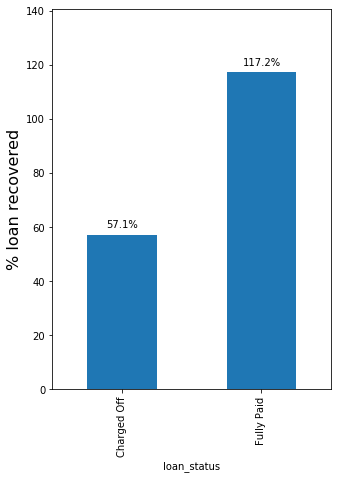

In [67]:
plt.figure(figsize=(5,7))
ax = (final_loan.groupby('loan_status').total_pymnt.sum() * 100 / final_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

__Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit.__

### Let us see graphs of some other important variables

**loan_amnt** : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

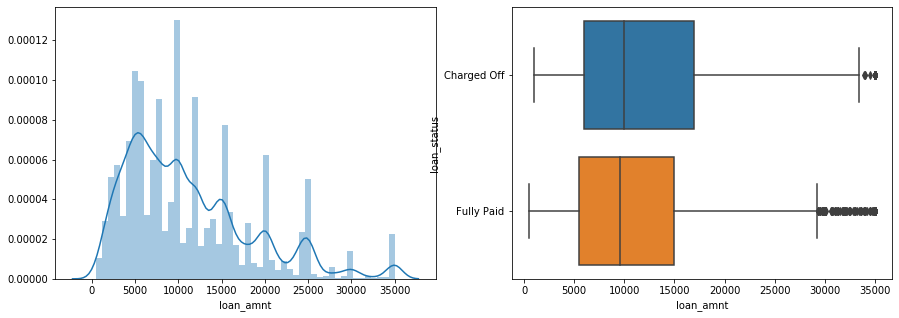

In [68]:
plot_distribution(final_loan, 'loan_amnt')

In [69]:
final_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


**Observation:**

- Overall, the applied loan amount distribution is slightly __right-skewed__ with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
- Funding amounts see a spike around each 5000 boundary. <mark>We will use 5000 as bucket size for later analysis.</mark>
- Charged off loans are shifted towards higher average loan amount request.

In [70]:
#Create Derived categorical variable
final_loan['loan_amnt_bin'] = pd.cut(final_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

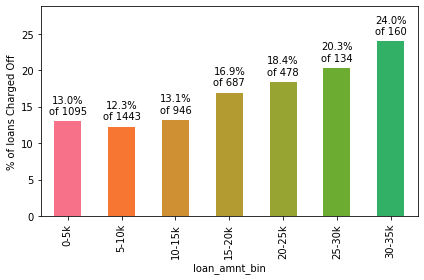

In [71]:
plotLoanStatus(final_loan, 'loan_amnt_bin')

**Observation** :

- The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default.

**Other categorical variables distribution**

Let's see how some other categorical variables of interest are distributed within the dataset 

In [72]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

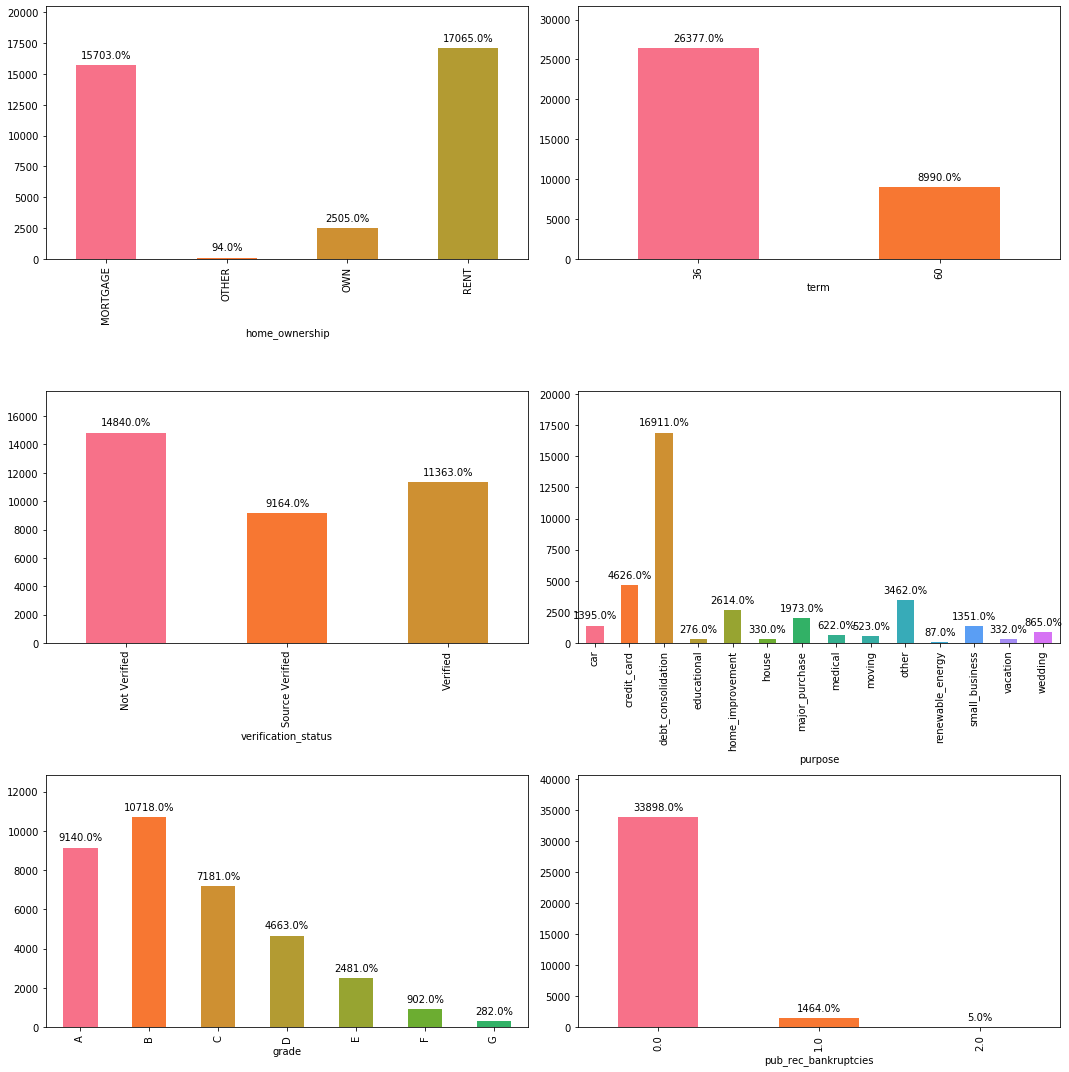

In [73]:
plt.figure(figsize=(15,15))

categoricalBarPlots(final_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**term** : The number of payments on the loan. Values are in months and can be either 36 or 60.

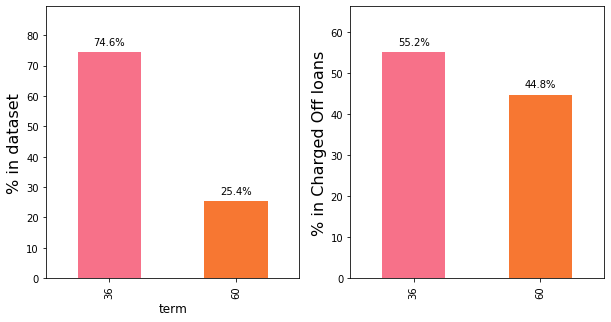

In [74]:
plt.figure(figsize=(10,5))
plot_percentages(final_loan, 'term')

**Observation** :

- Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
- Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.

**purpose** : A category provided by the borrower for the loan request.

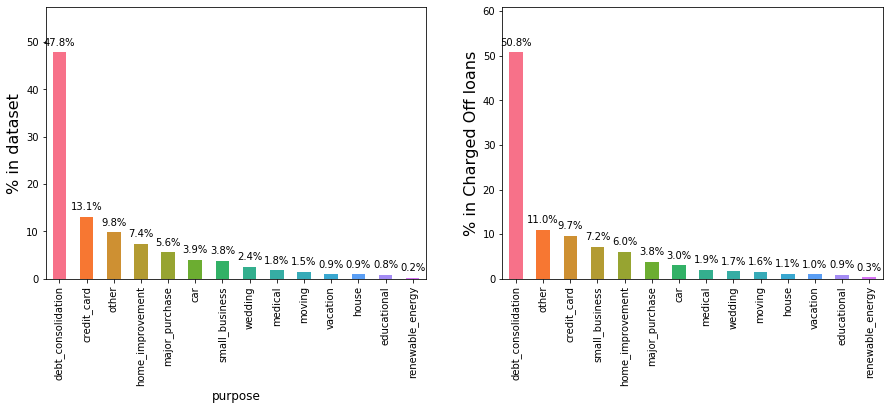

In [75]:
plt.figure(figsize=(15,5))
plot_percentages(final_loan, 'purpose')

**Observation** :

- The category *small_business* percentage __doubles from 3.8 to 7.2__ for Charged Off loans. Let's see how the categories of this variable behave.

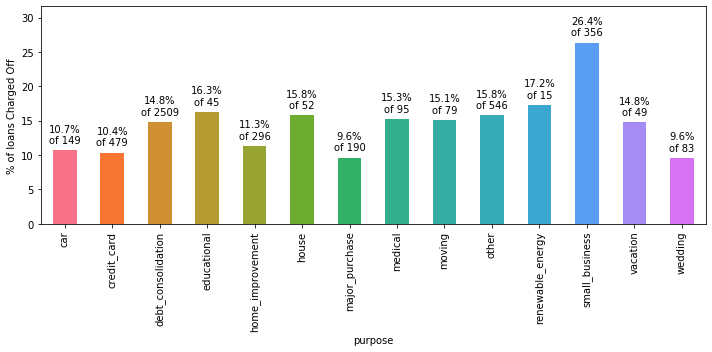

In [76]:
plt.figure(figsize=(10, 5))
plotLoanStatus(final_loan, 'purpose')

**Observation** :

- 26% of loans for small business are Charged Off. Making them the most risky purpose.
- Approximately ~49% of the loans are issued for the purpose of dept consolidation.
- 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

**pub_rec_bankruptcy** : Number of public record bankruptcies

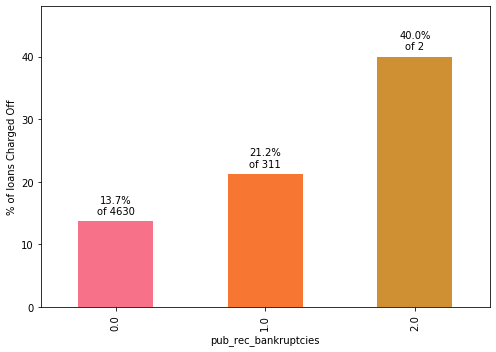

In [77]:
plt.figure(figsize=(7,5))
plotLoanStatus(final_loan, 'pub_rec_bankruptcies')

**Observation** :

- The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.

**int_rate** : Interest Rate on the loan.

In [78]:
final_loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

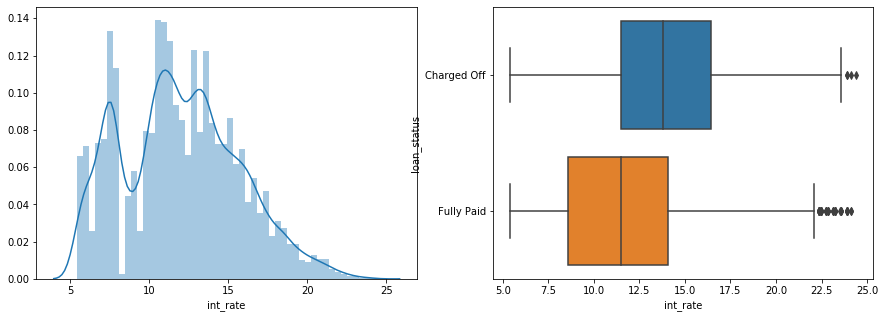

In [79]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'int_rate')

In [80]:
final_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


**Observation** :

- Overall, the intrest rate varies from **5.42% to 24.4%** with average intrest rate of **11.8%**.
- The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more

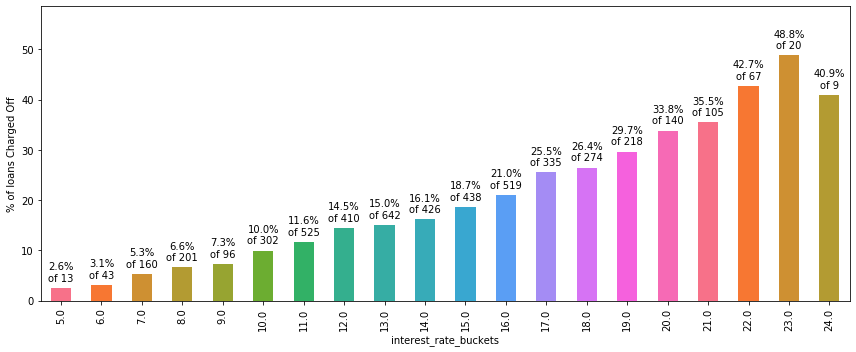

In [81]:
final_loan['interest_rate_buckets'] = round(final_loan['int_rate'])
plt.figure(figsize=(12,5))
plotLoanStatus(final_loan, 'interest_rate_buckets')

**installment** : The monthly payment owed by the borrower if the loan originates.

In [82]:
final_loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

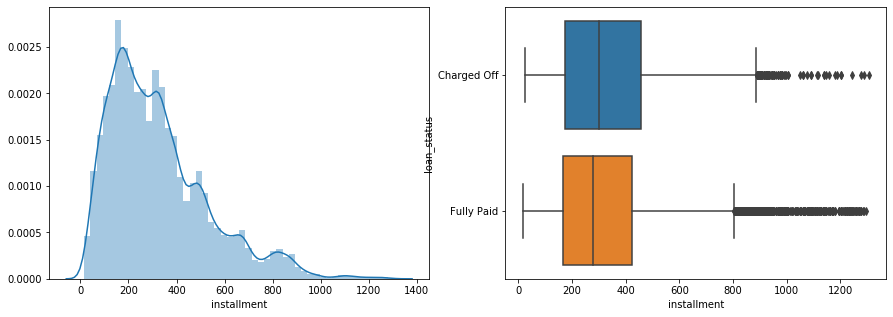

In [83]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'installment')

final_loan.groupby('loan_status')['installment'].describe()

**Observation** :

- installment amount varies largely between 170.08 to 420 with median of 280
- loans Charged Off have high installment on average

**grade and sub_grade** : LC assigned loan grade and subgrade.

In [84]:
final_loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

Let's find the relative frequencies of the unique sub_grade.

In [85]:
final_loan.sub_grade.value_counts(normalize=True).head()

A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: sub_grade, dtype: float64

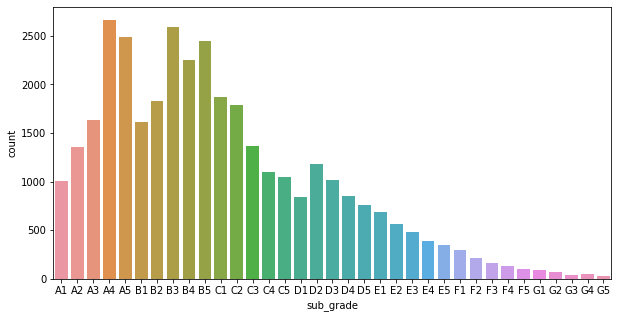

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(final_loan['sub_grade'], order=sorted(final_loan.sub_grade.unique()))
plt.show()

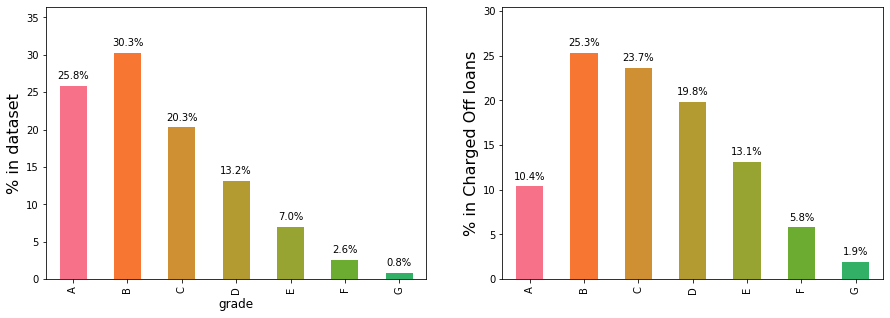

In [87]:
plt.figure(figsize=(15,5))
plot_percentages(final_loan, 'grade', True)

**Observation** :

- Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
- Grade D, E, F, G loans are less safe. We should plot grade by percentage Charged Off by category
- Lending Clubs grading system is working well.

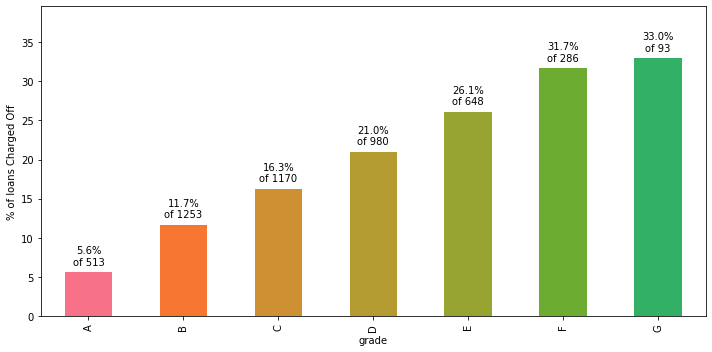

In [88]:
plt.figure(figsize=(10,5))
plotLoanStatus(final_loan, 'grade')

**Observation** :

- Nearly 30% of all loans in Grades F and G see a default.
- Grade E onwards are risky, and less numerous. Lending Club should either refuse loans or charge high interest rates.

**emp_title** : The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [89]:
# top 10 employee
top_10_emp_title = final_loan.emp_title.value_counts(normalize=False).head(10)

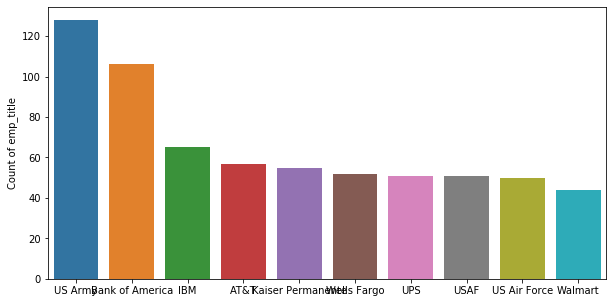

In [91]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top_10_emp_title.index, y=top_10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

**Observation** :

- Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
- Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
- The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates.

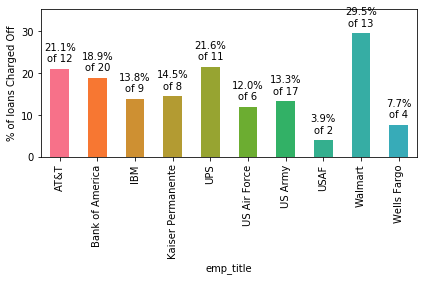

In [93]:
plotLoanStatus(final_loan[final_loan['emp_title'].isin(top_10_emp_title.index.values)], 'emp_title')

**emp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [95]:
final_loan.emp_length.value_counts(normalize=True)

10    0.226991
2     0.115447
0     0.112478
3     0.108378
4     0.090649
5     0.086041
1     0.083666
6     0.058303
7     0.046314
8     0.038482
9     0.033251
Name: emp_length, dtype: float64

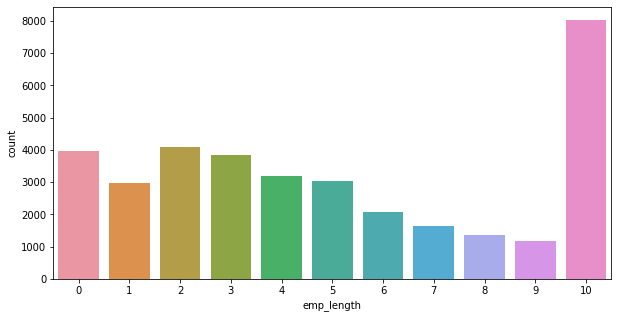

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(final_loan['emp_length'], order=sorted(final_loan.emp_length.unique()))
plt.show()

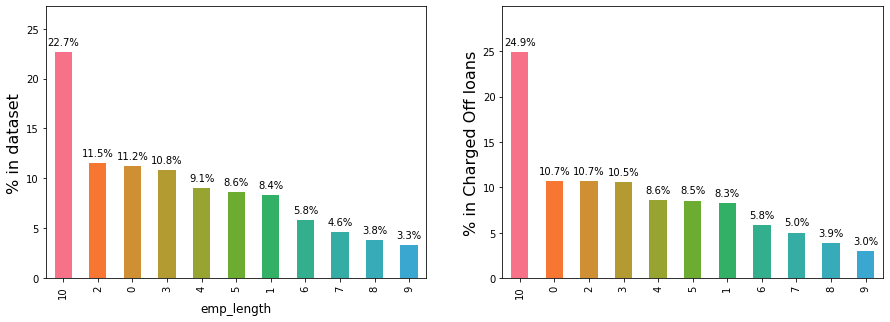

In [97]:
plt.figure(figsize=(15, 5))
plot_percentages(final_loan, 'emp_length')

**Observation** :

- 22.7% of the of loan taker have an employment length of more than 10 years.
- There is no impact of employment length to chance of loan default.

**home_ownership** : The home ownership status provided by the borrower during registration. Our values are: __RENT, OWN, MORTGAGE, OTHER.__

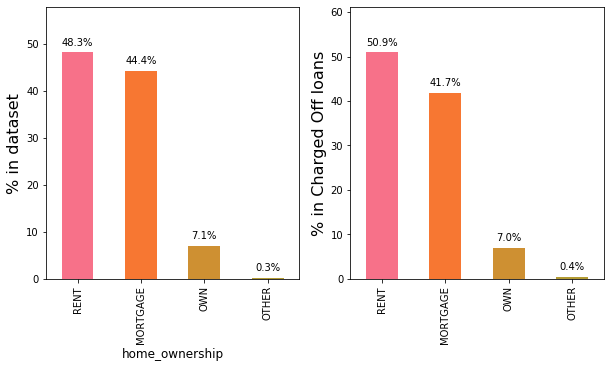

In [98]:
plt.figure(figsize=(10,5))
plot_percentages(final_loan, 'home_ownership')

**Observation** :

- There is no impact of home_ownership to default on loan.

**annual_inc** : The self-reported annual income provided by the borrower during registration.

In [100]:
final_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [103]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
dataframe = final_loan[np.abs(final_loan.annual_inc-final_loan.annual_inc.mean()) <= (3*final_loan.annual_inc.std())]

In [104]:
dataframe.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

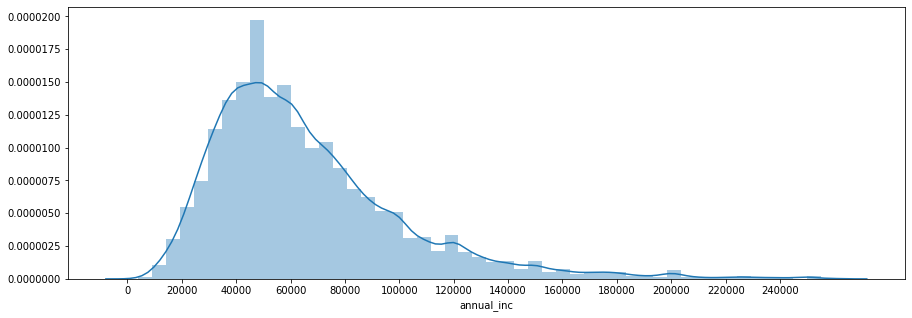

In [105]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

**Observation** :

- 10000 seems to be a good bin size to further analyze income as categories

In [108]:
#Create Derived categorical variable
final_loan['income_bin'] = (final_loan['annual_inc']/20000).astype(int)

[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

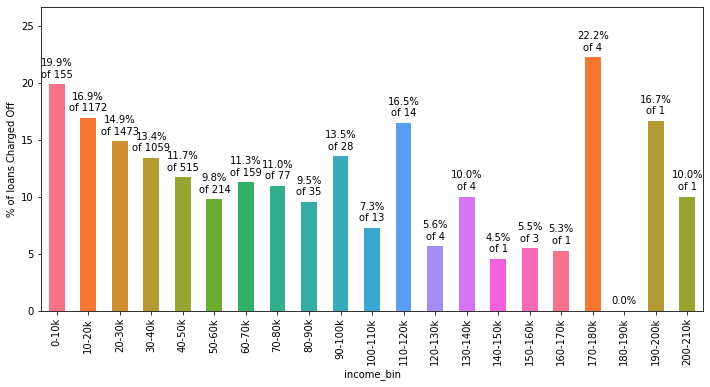

In [109]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(final_loan.loc[final_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

**Observation** :

- Loan defaults are higher for lower income, and progressively reduce as incomes go up.
- It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

**verification_status** : Indicates if income was verified by LC, not verified, or if the income source was verified

In [110]:
final_loan.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

Loans **'Verified'** and **'Source Verified'** status both imply that LC has cross checked the income value specified by the borrower and thus both status can be treated as one.

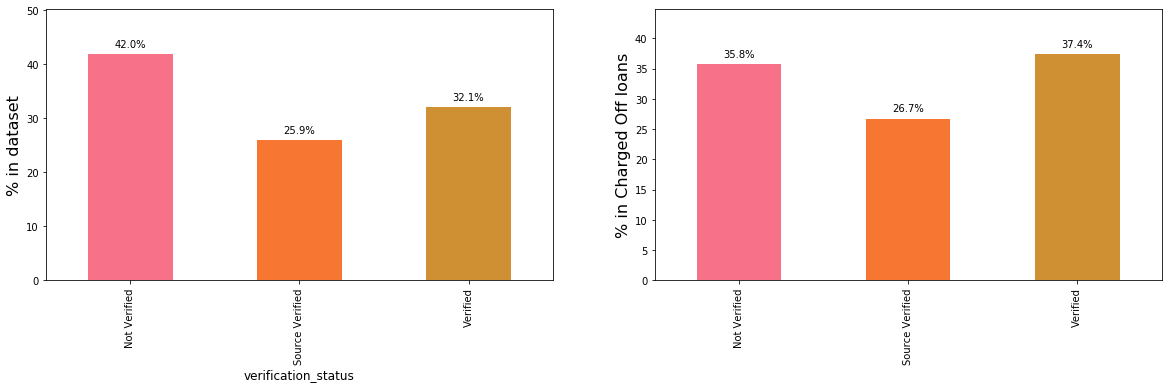

In [112]:
plt.figure(figsize=(20,5))
plot_percentages(final_loan, 'verification_status', True)

**Observation** :

- Overall, it appears that there are more **'Non Verified'** loans than the **'Source Verified'** and **'Verified'** loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
- Verified loans show more charged Off percentage as compared to Not verified loans. This is unexpected and will be investigated later in bivariate analysis

**issue_d** : The month which the loan was funded

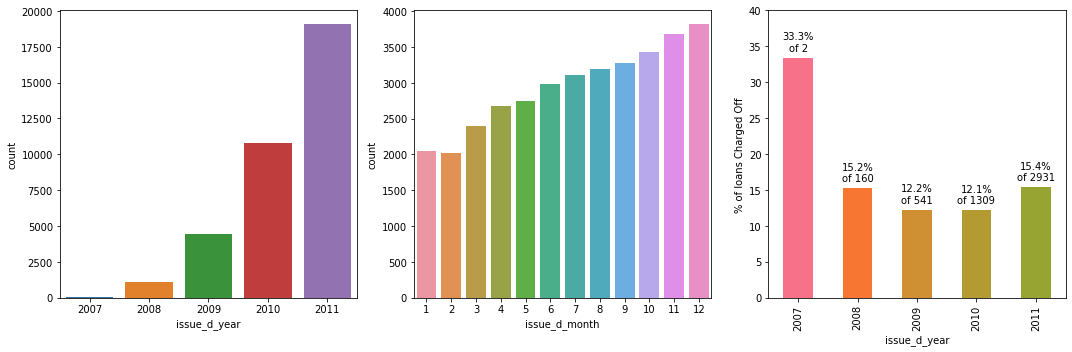

In [113]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(final_loan['issue_d_year'], order=sorted(final_loan.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(final_loan['issue_d_month'], order=sorted(final_loan.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(final_loan, 'issue_d_year')

plt.show()

**Observation** :

- Over the years, LC as an organisation has been giving more loans. From __Aug,2007 to 2011__ the loans issued have risen significantly.
- Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year?
- Year of loan has no significant effect on likelihood of default.

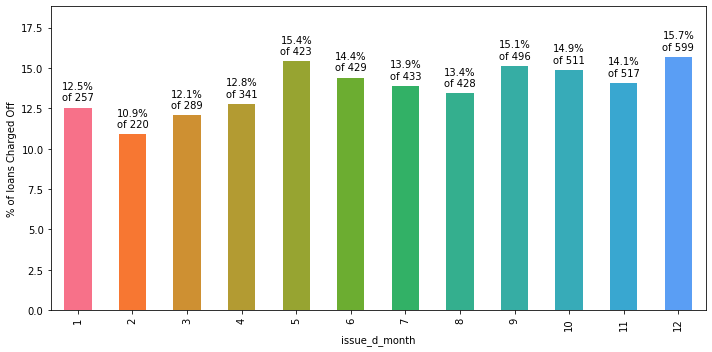

In [114]:
plt.figure(figsize=(10, 5))
plotLoanStatus(final_loan, 'issue_d_month')

**Observation:**

-  Month of loan is spread out and has no significant effect on likelihood of default. 

**title** : The loan title provided by the borrower

In [115]:
final_loan.title.describe()

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object

In [116]:
final_loan.title.value_counts().head(10)

Debt Consolidation           1975
Debt Consolidation Loan      1541
Personal Loan                 589
Consolidation                 462
debt consolidation            440
Credit Card Consolidation     325
Home Improvement              324
Debt consolidation            303
Personal                      281
Credit Card Loan              280
Name: title, dtype: int64

**Observation** :

- title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column.

In [117]:
final_loan = final_loan.drop('title',axis =1 )

**addr_state** : The state provided by the borrower in the loan application

In [118]:
final_loan.addr_state.value_counts(normalize=True).head(10)

CA    0.180847
NY    0.095739
FL    0.071677
TX    0.069358
NJ    0.047134
IL    0.039048
PA    0.038822
VA    0.035626
GA    0.035429
MA    0.033393
Name: addr_state, dtype: float64

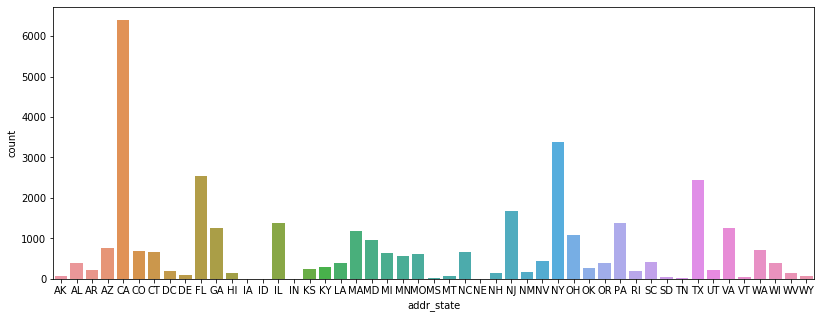

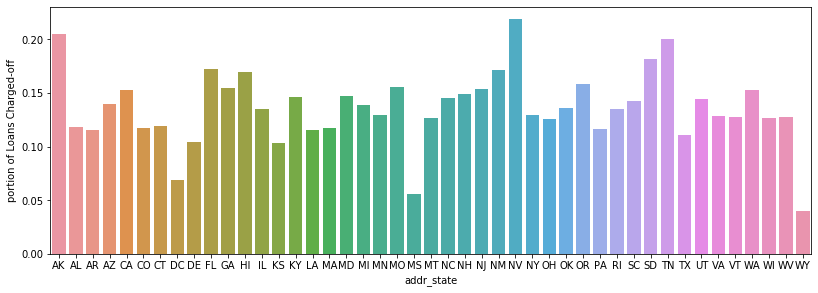

In [119]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(final_loan['addr_state'], order=sorted(final_loan.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = final_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = final_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')

plt.show()

**Observation** :

- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default.

**dti** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [120]:
final_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

The **dti** index varies from min 0 to max of 30. The median dti is of 13.5

<Figure size 720x360 with 0 Axes>

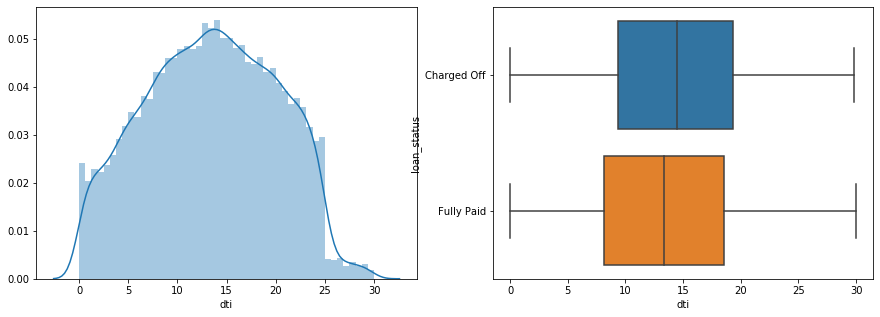

In [121]:
plt.figure(figsize=(10,5))

plot_distribution(final_loan, 'dti')

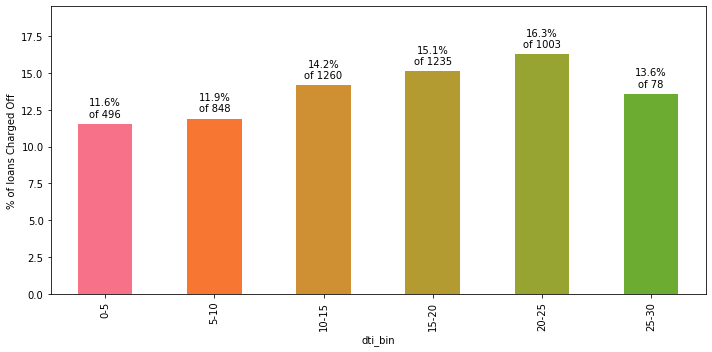

In [123]:
# Create derived variable 
final_loan['dti_bin'] = pd.cut(final_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
plt.figure(figsize=(10,5))
plotLoanStatus(final_loan, 'dti_bin')

**Observation** :

- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

**delinq_2yrs** : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [124]:
final_loan.delinq_2yrs.value_counts(normalize=True)

0     0.891594
1     0.083100
2     0.017361
3     0.005344
4     0.001499
5     0.000594
6     0.000283
7     0.000113
8     0.000057
11    0.000028
9     0.000028
Name: delinq_2yrs, dtype: float64

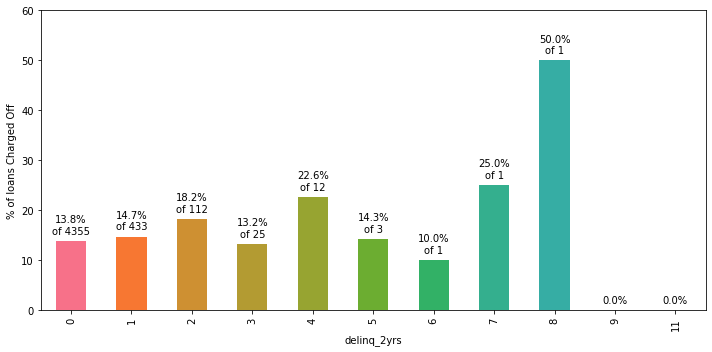

In [125]:
plt.figure(figsize=(10,5))
plotLoanStatus(final_loan, 'delinq_2yrs')

**Observation** :

- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1.

**earliest_cr_line** : The month the borrower's earliest reported credit line was opened.

In [126]:
final_loan.earliest_cr_line_year.value_counts(normalize=True).head()

2000    0.083326
1999    0.076201
1998    0.072638
2001    0.065259
1997    0.062403
Name: earliest_cr_line_year, dtype: float64

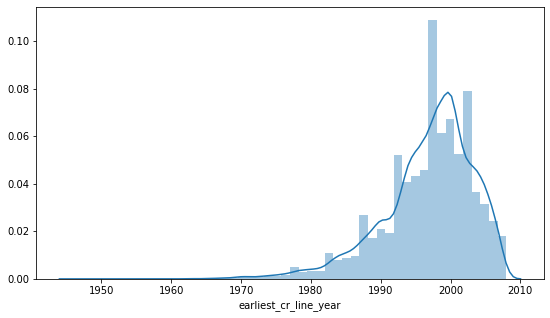

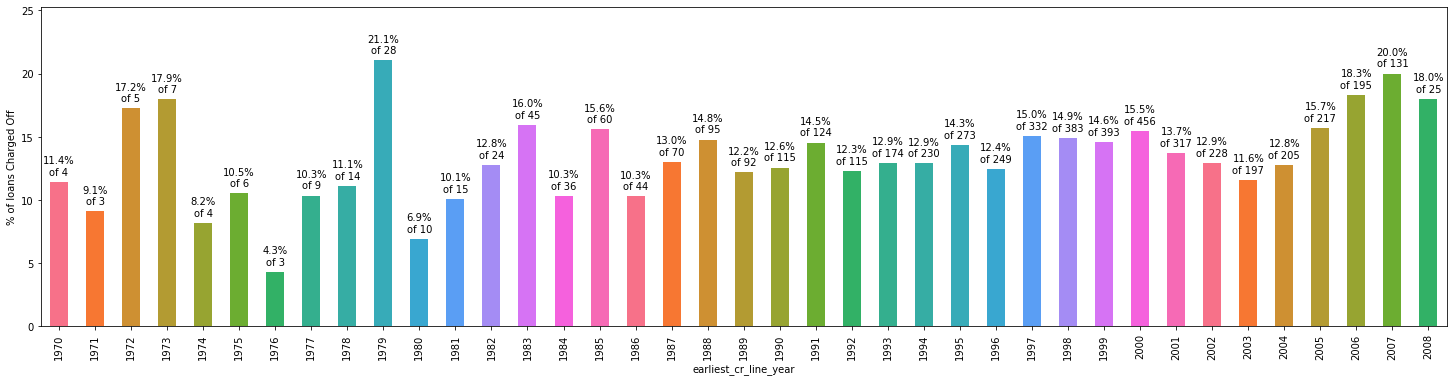

In [127]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

sns.distplot(final_loan['earliest_cr_line_year'])

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(final_loan.loc[final_loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

**Observation** :

- 8% of the loan applicants have 2000 as the year of earliest credit line.
- Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis.
- There was another economic crisis in US beginning in 1978 with double digit inflation. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis.


**inq_last_6mths** : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [128]:
final_loan.inq_last_6mths.value_counts(normalize=True)

0    0.485848
1    0.276359
2    0.147256
3    0.076427
4    0.007917
5    0.003478
6    0.001527
7    0.000877
8    0.000311
Name: inq_last_6mths, dtype: float64

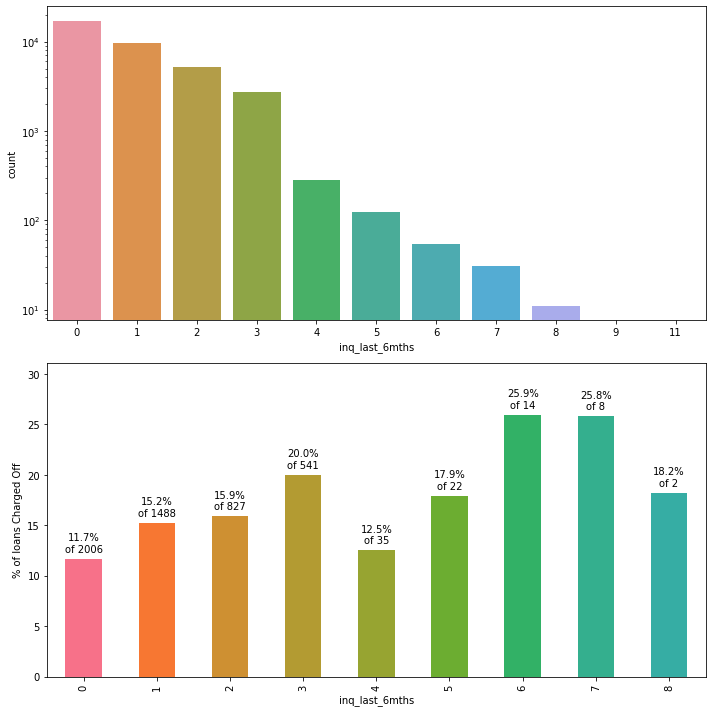

In [129]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(final_loan['inq_last_6mths'], order=sorted(final_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(final_loan, 'inq_last_6mths')
plt.show()

**Observation** :

- 48.5% of the borrowers do not make any inquiry
- Those with more than 2 inquiries default at higher rates.
- This is probably correlated to having more loans and can be ignored. The revolving line utilization will cover this.

**open_acc** : The number of open credit lines in the borrower's credit file.

In [130]:
final_loan.open_acc.describe()

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.

<Figure size 1080x360 with 0 Axes>

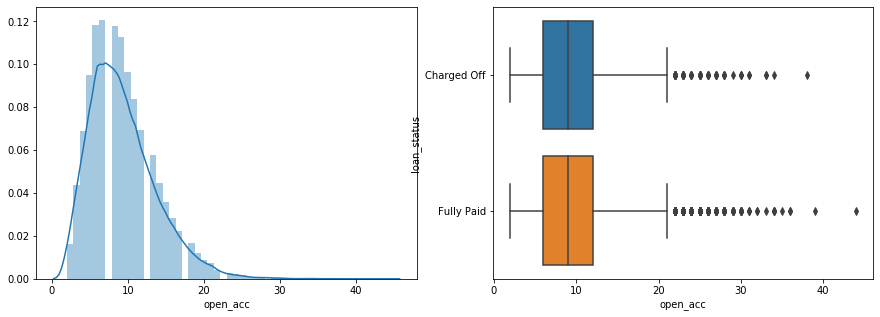

In [131]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'open_acc')
plt.show()

In [132]:
final_loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


**Observation** :

- The median of the distribution suggests that by large the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.

**pub_rec** : Number of derogatory public records.

In [134]:
final_loan.pub_rec.value_counts(normalize=True)

0    0.947663
1    0.050838
2    0.001244
3    0.000198
4    0.000057
Name: pub_rec, dtype: float64

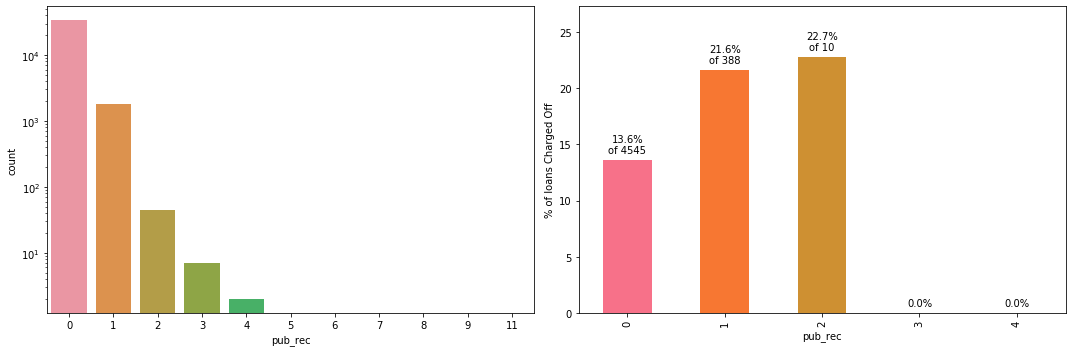

In [135]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(final_loan['pub_rec'], order=sorted(final_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(final_loan, 'pub_rec')
plt.show()

**Observation** :

- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

**revol_bal** : Total credit revolving balance

In [136]:
final_loan.revol_bal.describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

The revolving bal varies from min 0 to max of 150,000. The median revol_bal is of **~9000**.

In [137]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
final_loan = final_loan[np.abs(final_loan.revol_bal-final_loan.revol_bal.mean()) <= (3*final_loan.revol_bal.std())]
final_loan['revol_bal_log'] = final_loan['revol_bal'].apply(lambda x : np.log(x+1))

The values vary a lot. Transforming to a log scale will help analyse better.

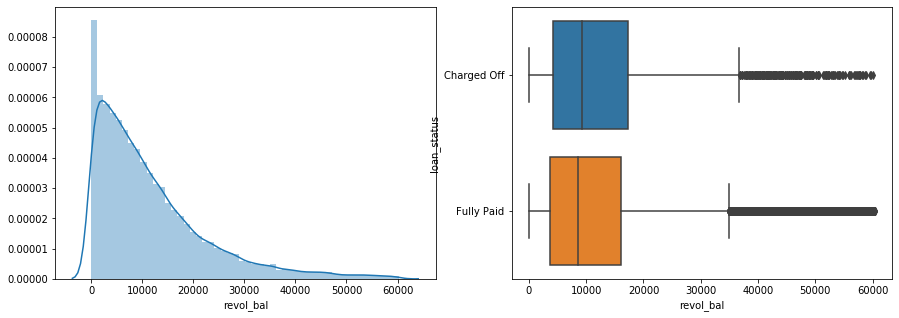

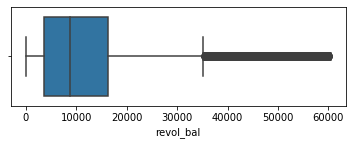

In [139]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(final_loan['revol_bal'])

plt.subplot(1, 2, 2)
sns.boxplot(x=final_loan['revol_bal'], y=final_loan['loan_status'], data=final_loan)

plt.show()

plt.subplot(2, 1, 1)
sns.boxplot(x=final_loan['revol_bal'], data=final_loan)
plt.show()

In [140]:
final_loan.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,12453.837382,11330.139812,0.0,4161.0,9336.5,17212.5,60071.0
Fully Paid,29739.0,11641.208884,10974.614732,0.0,3612.0,8581.0,16138.5,60376.0


**Observation** :

- There is no large difference in revolving balance mean for charged off an fully Paid loans

**revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [141]:
final_loan.revol_util.describe()

count    34597.000000
mean        48.904609
std         28.210493
min          0.000000
25%         25.600000
50%         49.400000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

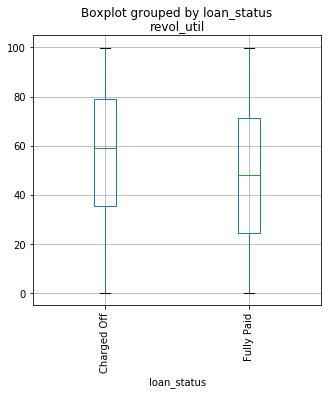

In [142]:
fig, ax = plt.subplots(figsize=(5,5))
df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

**Observation** :

- The average utilization rate is around 49%
- Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans. This requires more analysis.

In [143]:
final_loan['revol_util_bin'] = round(final_loan['revol_util']/5)

/Users/deepanshusinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


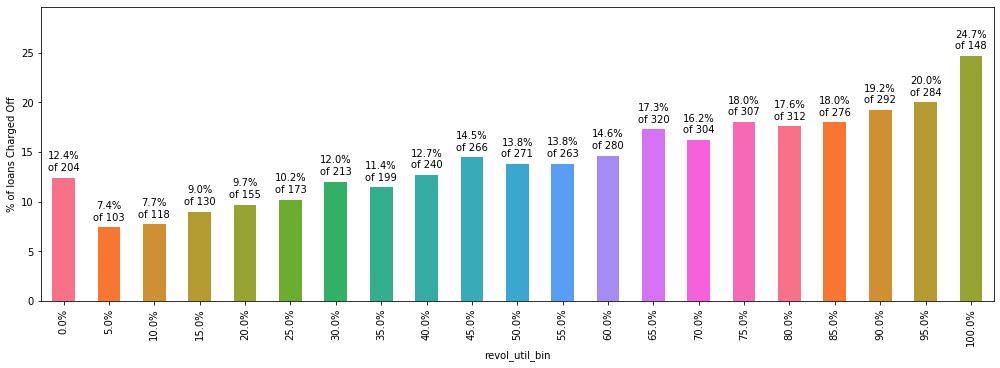

In [144]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(final_loan, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

**total_acc** : The total number of credit lines currently in the borrower's credit file.

In [145]:
final_loan.total_acc.describe()

count    34597.000000
mean        22.006272
std         11.325562
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

<Figure size 1080x360 with 0 Axes>

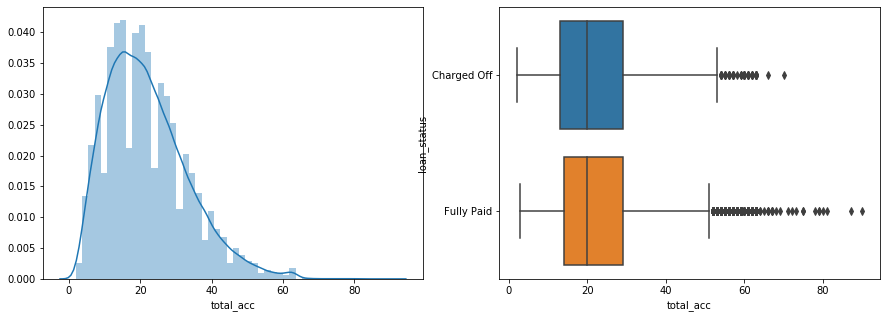

In [146]:
plt.figure(figsize=(15,5))

plot_distribution(final_loan, 'total_acc')

**Observation** :

- The are approx. 22 average credit lines for the borrower's.
- There is no big difference between the Charged Off and Fully Paid credit lines

**out_prncp** : Remaining outstanding principal for total amount funded.

In [147]:
final_loan.out_prncp.value_counts()

0.0    34597
Name: out_prncp, dtype: int64

In [148]:
final_loan.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,29739.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation** :

- As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp variable can be removed or droped.

In [149]:
final_loan = final_loan.drop('out_prncp',axis=1)

**out_prncp_inv** : Remaining outstanding principal for portion of total amount funded by investors

In [150]:
final_loan.out_prncp_inv.value_counts()

0.0    34597
Name: out_prncp_inv, dtype: int64

In [151]:
final_loan.groupby('loan_status')['out_prncp_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4858.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,29739.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation** :

- As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ignored for analysis. Therefore out_prncp_inv variable can be removed or dropped.

In [152]:
final_loan = final_loan.drop('out_prncp_inv',axis=1)

**total_pymnt** : Payments received to date for total amount funded.

In [153]:
final_loan.total_pymnt.describe()

count    34597.000000
mean     11894.392156
std       8715.509427
min         33.730000
25%       5571.230000
50%       9771.780000
75%      16113.960000
max      58563.680000
Name: total_pymnt, dtype: float64

In [155]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
final_loan = final_loan[np.abs(final_loan.total_pymnt-final_loan.total_pymnt.mean()) <= (3*final_loan.total_pymnt.std())]
final_loan['total_pymnt'] = final_loan['total_pymnt'].apply(lambda x : np.log(x))

<Figure size 1080x360 with 0 Axes>

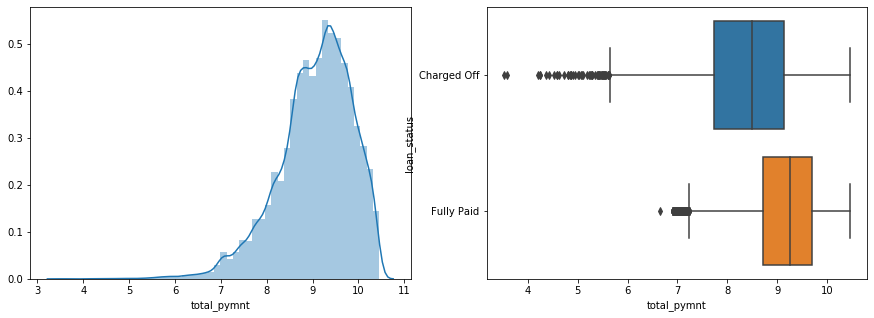

In [157]:
plt.figure(figsize=(15,5))
plot_distribution(final_loan, 'total_pymnt')
plt.show()

**Observation** :

- The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
- This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [158]:
final_loan = final_loan.drop('total_pymnt',axis=1)

**last_pymnt_d** : Last month payment was received.

In [159]:
final_loan.last_pymnt_d.value_counts().head()

2013-03-01    935
2014-12-01    840
2013-05-01    823
2013-02-01    792
2012-03-01    777
Name: last_pymnt_d, dtype: int64

In [160]:
final_loan['last_pymnt_d_month']= final_loan['last_pymnt_d'].dt.month
final_loan['last_pymnt_d_year']= final_loan['last_pymnt_d'].dt.year

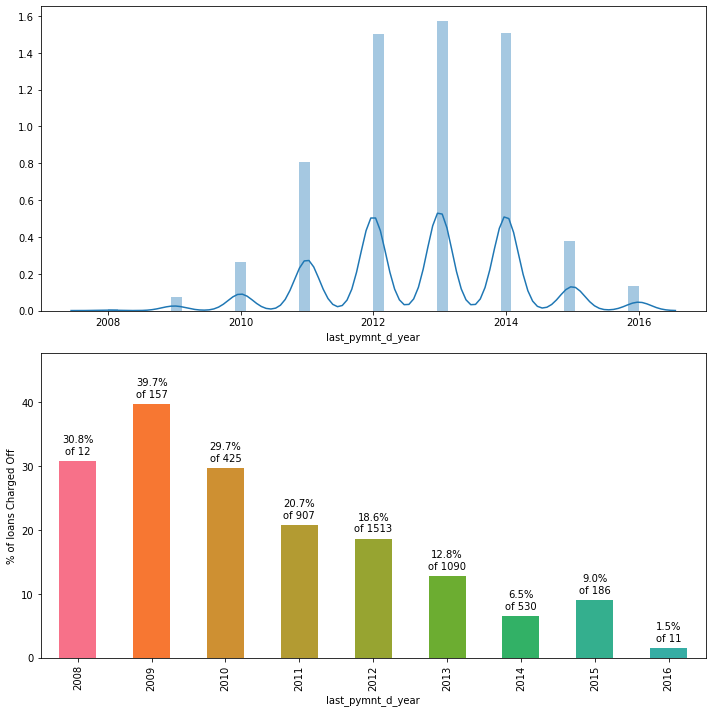

In [162]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)

sns.distplot(final_loan['last_pymnt_d_year'])

plt.subplot(2, 1, 2)
plotLoanStatus(final_loan, 'last_pymnt_d_year')
plt.show()

**Observation** :

- Overall, around 75% of the last payment dates are during 2012-2014 period.
- 40% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis.
- This variable does not affect analysis and will be ignored.

**last_pymnt_amnt** : Last total payment amount received.

In [164]:
final_loan.last_pymnt_amnt.describe()

count    33784.000000
mean      2573.690532
std       4053.045415
min          0.010000
25%        218.860000
50%        559.880000
75%       3358.772500
max      31147.450000
Name: last_pymnt_amnt, dtype: float64

The value vary a lot. Lets conver it to log scale and plot to find trend.

In [165]:
final_loan['last_pymnt_amnt_log'] = final_loan['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

<Figure size 1080x360 with 0 Axes>

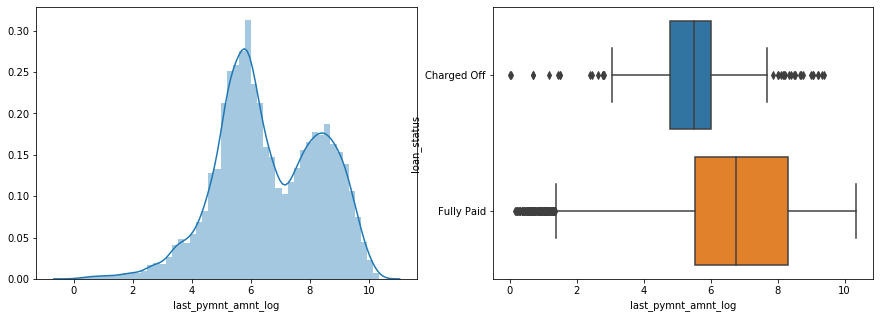

In [166]:
plt.figure(figsize=(15,5))

plot_distribution(final_loan, 'last_pymnt_amnt_log')
plt.show()

**Observation** :

- The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. - This is expected in case of charged of loans

**last_credit_pull_d** : The most recent month LC pulled credit for this loan.

In [167]:
final_loan.last_credit_pull_d.value_counts().head()

2016-05-01    8274
2016-04-01    2083
2016-03-01     999
2013-02-01     749
2016-02-01     640
Name: last_credit_pull_d, dtype: int64

In [168]:
final_loan['last_credit_pull_d_month']= final_loan['last_credit_pull_d'].dt.month
final_loan['last_credit_pull_d_year']= final_loan['last_credit_pull_d'].dt.year

In [169]:
final_loan.last_credit_pull_d_year.value_counts(normalize=True)

2016    0.372040
2014    0.162414
2015    0.144269
2013    0.136307
2012    0.107151
2011    0.054848
2010    0.018204
2009    0.004233
2008    0.000533
Name: last_credit_pull_d_year, dtype: float64

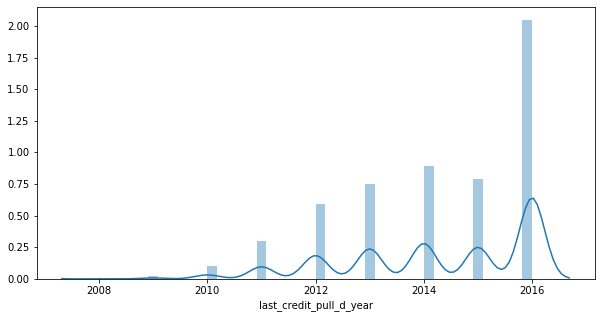

In [170]:
plt.figure(figsize=(10,5))
sns.distplot(final_loan['last_credit_pull_d_year'])
plt.show()

**Observation** :

- Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously
- This variable can be ignored in our analysis.

### Derived variable - ratio of loan amount to annual income

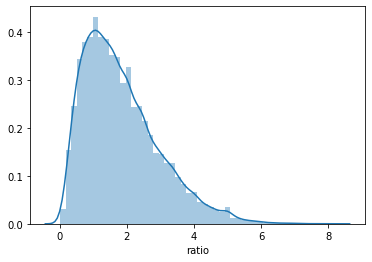

In [171]:
final_loan['ratio'] = final_loan['loan_amnt'] * 10 / final_loan['annual_inc']
sns.distplot(final_loan['ratio'])

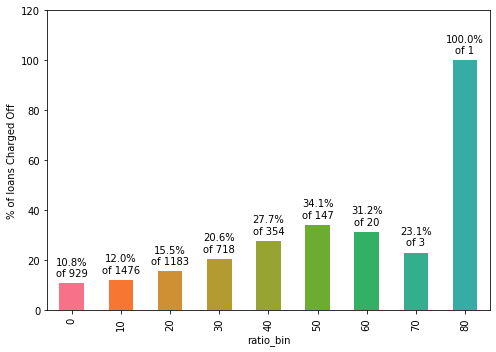

In [172]:
final_loan['ratio_bin'] = (final_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(final_loan, 'ratio_bin')

**Observation** :

- As long as loan amount is less than 20% of annual income, defaults are low.
- Loan amounts of 30% of annual income or higher see a high rate of default.

## Bivariate Analysis

**loan_amnt over time**

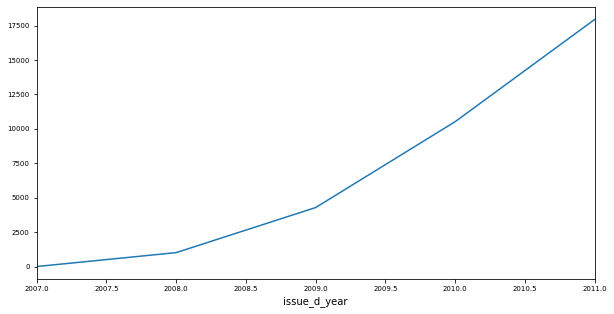

In [174]:
plt.figure(figsize=(10,5))
final_loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

**Avg. loan_amnt over time**

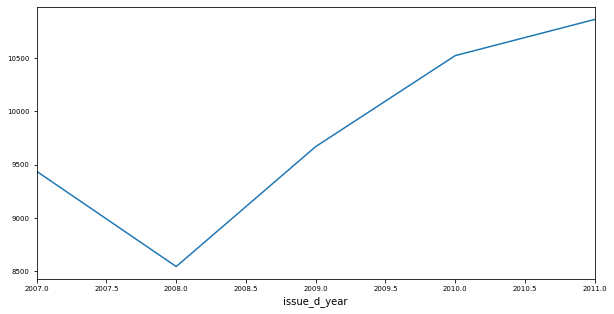

In [175]:
plt.figure(figsize=(10,5))
final_loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()